# A. Phương pháp K-NN cho phân loại nhị phân

## Ví dụ A.1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.preprocessing import StandardScaler

np.random.seed(2)
X = np.array(
    [0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00,
     5.50])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

X_test_A1 = np.array([2.45, 1.85, 3.75, 3.21, 4.05])

In [2]:
k = 4
y_pred_A1 = np.zeros(len(X_test_A1))


def distance(array, value):
    return np.abs(np.subtract(array, value))


def find_nearest_neighbor(array, value, k):
    array_D = distance(value, array)
    return np.argsort(array_D)[:k]


for i in range(len(X_test_A1)):
    indexis = find_nearest_neighbor(X, X_test_A1[i], k)
    for id in indexis:
        y_pred_A1[i] += y[id]
    y_pred_A1[i] /= k
    if y_pred_A1[i] >= 0.5:
        y_pred_A1[i] = 1
    else:
        y_pred_A1[i] = 0
    print(y_pred_A1[i])

1.0
0.0
1.0
1.0
1.0


## Ví dụ A2

In [3]:
x_data_A2 = []
y_data_A2 = []

with open('vidu4_lin_reg.txt') as f:
    lines = f.readlines()
lines.pop(0)
for line in lines:
    line = line.replace('\n', '').split(' ')
    line = list(map(float, line))
    x_data_A2.append([1, line[0], line[1], line[2], line[3], line[4]])
    if (line[-1] >= 1):
        y_data_A2.append(1)
    else:
        y_data_A2.append(0)
x_data_A2 = np.array(x_data_A2)
y_data_A2 = np.array(y_data_A2)

x_data_A2, y_data_A2 = shuffle(x_data_A2, y_data_A2)

x_train_A2 = x_data_A2[:80]
y_train_A2 = y_data_A2[:80]

x_test_A2 = x_data_A2[80:]
y_test_A2 = y_data_A2[80:]
y_pred_A2 = np.zeros(len(y_test_A2))

In [4]:
def distance(array, value):
    return np.linalg.norm(np.subtract(array, value), ord=2, axis=1)


def find_nearest_neighbor(array, value, k):
    array_D = distance(value, array)
    return np.argsort(array_D)[:k]


for i in range(len(x_test_A2)):
    indexis = find_nearest_neighbor(x_train_A2, x_test_A2[i], k)
    for id in indexis:
        y_pred_A2[i] += y_train_A2[id]
    y_pred_A2[i] /= k
    if y_pred_A2[i] >= 0.5:
        y_pred_A2[i] = 1
    else:
        y_pred_A2[i] = 0
    print(y_pred_A2[i])

1.0
1.0
1.0
0.0
1.0
0.0
0.0
0.0
1.0
1.0
1.0
0.0
1.0
0.0
1.0
1.0
0.0
1.0
0.0
0.0


# B.Phương Pháp Hồi Quy Logistic

## Ví dụ B.1

In [5]:
np.random.seed(2)
X_B1 = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50,
                  4.75, 5.00, 5.50]])
y_B1 = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

X_B1 = np.concatenate((np.ones((1, X_B1.shape[1])), X_B1), axis=0)

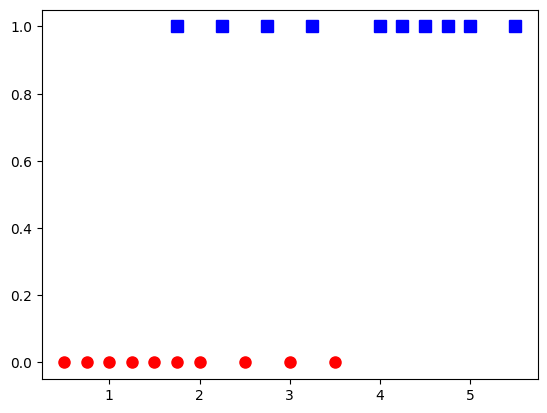

In [6]:
X0 = X_B1[1, np.where(y == 0)][0]
y0 = y_B1[np.where(y == 0)]
X1 = X_B1[1, np.where(y == 1)][0]
y1 = y_B1[np.where(y == 1)]

plt.plot(X0, y0, 'ro', markersize=8)
plt.plot(X1, y1, 'bs', markersize=8)
plt.show()

In [7]:
def sigmoid(s):
    s = np.clip(s, -709.78, 709.78)
    return 1 / (1 + np.exp(-s))


def logistic_sigmoid_regression(X, y, w_init, eta, tol=1e-4, max_count=10000):
    w = [w_init]
    N = X.shape[1]
    d = X.shape[0]
    count = 0
    check_w_after = 20

    while count < max_count:
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T, xi))
            w_new = w[-1] + eta * (yi - zi) * xi
            count += 1
            if count % check_w_after == 0:
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    return w
            w.append(w_new)
    return w

In [8]:
eta = 0.05
d = X_B1.shape[0]
w_init = np.random.randn(d, 1)
w = logistic_sigmoid_regression(X_B1, y_B1, w_init, eta)

print(np.dot(w[-1].T, X_B1))

print(sigmoid(np.dot(w[-1].T, X_B1)))

[[-3.31630879 -2.92811569 -2.53992258 -2.15172948 -1.76353637 -1.37534327
  -1.37534327 -0.98715017 -0.59895706 -0.21076396  0.17742915  0.56562225
   0.95381536  1.34200846  2.11839467  2.50658777  2.89478088  3.28297398
   3.67116709  4.44755329]]
[[0.03501592 0.05078108 0.07310642 0.10416972 0.14634799 0.20175793
  0.20175793 0.27147534 0.35458234 0.4475032  0.54424128 0.63775242
  0.72188183 0.79282004 0.89267823 0.92460236 0.94758783 0.96384008
  0.97518471 0.9884283 ]]


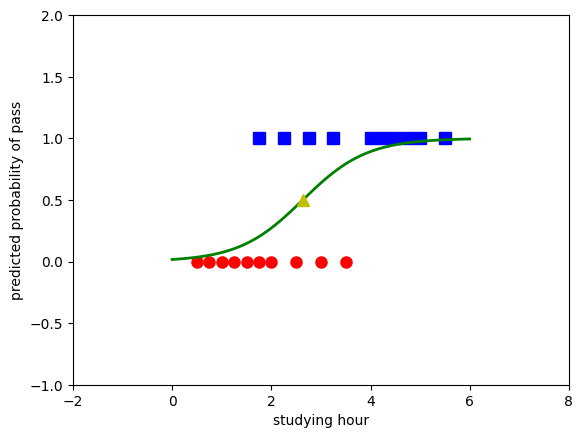

In [9]:
X0 = X_B1[1, np.where(y == 0)][0]
y0 = y_B1[np.where(y == 0)]
X1 = X_B1[1, np.where(y == 1)][0]
y1 = y_B1[np.where(y == 1)]

plt.plot(X0, y0, 'ro', markersize=8)
plt.plot(X1, y1, 'bs', markersize=8)

xx = np.linspace(0, 6, 1000)
w0 = w[-1][0][0]
w1 = w[-1][1][0]
threshold = -w0 / w1
yy = sigmoid(w0 + w1 * xx)
plt.axis([-2, 8, -1, 2])
plt.plot(xx, yy, '-g', linewidth=2)
plt.plot(threshold, .5, 'y^', markersize=8)
plt.xlabel('studying hour')
plt.ylabel('predicted probability of pass')
plt.show()

In [10]:
x_test_B1 = np.array([[2.45, 1.85, 3.75, 3.21, 4.05]])
N = x_test_B1.shape[1]
xbar_B1 = np.concatenate((np.ones((1, N)), x_test_B1), axis=0)
w = np.array([w0, w1])


# Y_pred_B1 = np.zeros(xbar.shape[1])
# for i in range(len(Y_pred_B1)):
#     if((sigmoid(np.dot(w,xbar.T[i])))>=0.5):
#         Y_pred_B1[i] =1
def prob(w, X):
    return sigmoid(X.dot(w))


def predict(w, X):
    res = np.zeros(X.shape[0])
    res[np.where(prob(w, X) >= 0.5)[0]] = 1
    return res


Y_pred_B1 = predict(w, xbar_B1.T)
print(w)
print(Y_pred_B1)

# kết quả so phuong pháp KNN tuơng đối giống nhau

[-4.092695    1.55277242]
[0. 0. 1. 1. 1.]


## Ví dụ B.2

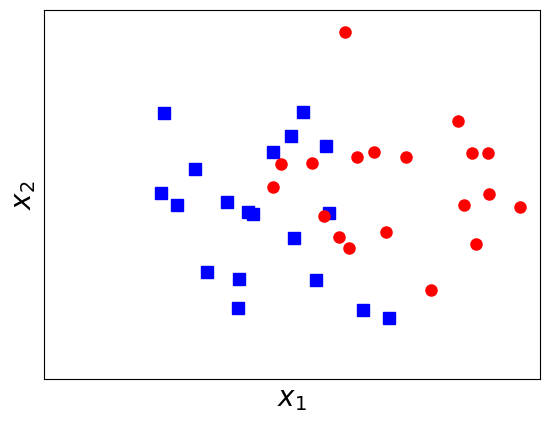

In [11]:
# sinh dữ liệu theo phân phối chuẩn nhiều chiều

np.random.seed(22)

means = [[2, 2], [4, 2]]
cov = [[0.7, 0], [0, 0.7]]
N = 20

X1 = np.random.multivariate_normal(means[0], cov, N)
X2 = np.random.multivariate_normal(means[1], cov, N)

# vẽ biểu đồ

plt.plot(X1[:, 0], X1[:, 1], 'bs', markersize=8, alpha=1)
plt.plot(X2[:, 0], X2[:, 1], 'ro', markersize=8, alpha=1)
plt.axis('equal')
plt.ylim(0, 4)
plt.xlim(0, 5)

cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.xlabel('$x_1$', fontsize=20)
plt.ylabel('$x_2$', fontsize=20)

plt.show()

In [12]:
X_B2 = np.concatenate((X1, X2), axis=0).T
y_B2 = np.concatenate((np.zeros((1, N)), np.ones((1, N))), axis=1).T

X_B2 = np.concatenate((np.ones((1, 2 * N)), X_B2), axis=0)
eta = 0.05
d = X_B2.shape[0]
w_init = np.random.randn(d, 1)

w = logistic_sigmoid_regression(X_B2, y_B2, w_init, eta, tol=1e-4, max_count=10000)
print(w[-1])

[[-9.51043127]
 [ 2.25978315]
 [ 1.42588178]]


# dùng độ của màu để minh họa xác suất t điểm rơi vào class nào


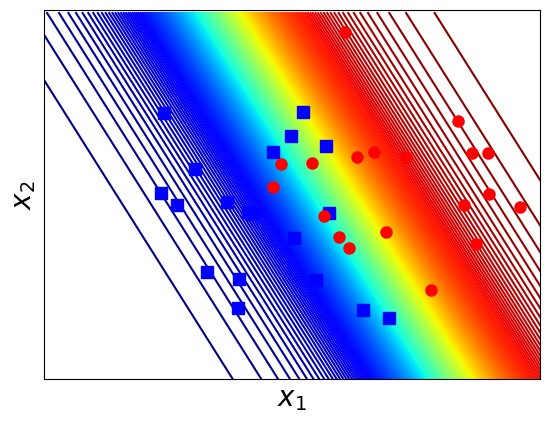

In [13]:
x1m = np.arange(-1, 6, 0.025)
xlen = len(x1m)
x2m = np.arange(0, 4, 0.025)
x1m, x2m = np.meshgrid(x1m, x2m)

w0 = w[-1][0][0]
w1 = w[-1][1][0]
w2 = w[-1][2][0]

zm = sigmoid(w0 + w1 * x1m + w2 * x2m)

cs = plt.contour(x1m, x2m, zm, 200, cmap='jet')

plt.plot(X1[:, 0], X1[:, 1], 'bs', markersize=8, alpha=1)
plt.plot(X2[:, 0], X2[:, 1], 'ro', markersize=8, alpha=1)
plt.axis('equal')
plt.ylim(0, 4)
plt.xlim(0, 5)

cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])
plt.xlabel('$x_1$', fontsize=20)
plt.ylabel('$x_2$', fontsize=20)
plt.show()

## Ví dụ B.3(Bài tập 1):

In [14]:
# đọc dữ liệu
data = pd.read_csv('Admission_Predict.csv')

N = len(data)
sn = data['Serial No.'].tolist()
gre = data['GRE Score'].tolist()
X1 = np.asarray(gre).reshape(N, 1)

tfl = data['TOEFL Score'].tolist()
X2 = np.asarray(tfl).reshape(N, 1)

unirt = data['University Rating'].tolist()
X3 = np.asarray(unirt).reshape(N, 1)

sop = data['SOP'].tolist()
X4 = np.asarray(sop).reshape(N, 1)

lor1 = data['LOR '].tolist()
X5 = np.asarray(lor1).reshape(N, 1)

cgpa1 = data['CGPA'].tolist()
X6 = np.asarray(cgpa1).reshape(N, 1)

research_exp = data['Research'].tolist()
X7 = np.asarray(research_exp).reshape(N, 1)

prob_Admit = data['Chance of Admit'].tolist()
Yt = np.asarray(prob_Admit)

### phân loại bằng hồi quy logistic

In [15]:
def logistic_sigmoid_regression(X, y, w_init, eta, lam=0.0001, tol=1e-8, max_count=10000):
    w = [w_init]
    N = X.shape[1]
    d = X.shape[0]
    count = 0
    check_w_after = 20

    while count < max_count:
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T, xi))
            w_new = w[-1] + eta * (yi - zi) * xi - lam * w[-1] * 2
            count += 1
            if count % check_w_after == 0:
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    return w
            w.append(w_new)
    return w

In [16]:
y = np.zeros(Yt.shape[0])
y[np.where(Yt >= 0.75)[0]] = 1

# chọn 350 dòng làm training và còn lại là test
ones = np.ones((N, 1))
X = np.concatenate((ones, X1, X2, X3, X4, X5, X6, X7), axis=1)

scaler = StandardScaler()
X = scaler.fit_transform(X)
d = X.shape[1]
x_train_B3 = X[:350]
y_train_B3 = y[:350]

x_test_B3 = X[350:]
y_test_B3 = y[350:]

w_init = np.random.randn(d, 1)
eta = 0.05

w = logistic_sigmoid_regression(x_train_B3.T, y_train_B3, w_init, eta)
print(w[-1])

# y_pred_B3 = np.zeros(len(x_test_B3))
# for i in range(len(x_test_B3)):
#     if(sigmoid(np.dot(w[-1].T,x_test_B3[i]))>=0.5):
#         y_pred_B3[i] = 1
y_pred_B3a = predict(w[-1], x_test_B3)
print(y_pred_B3a)

[[0.10270405]
 [0.4853261 ]
 [0.59377319]
 [0.56147885]
 [0.24708405]
 [0.46984434]
 [1.61606941]
 [0.30794803]]
[0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1.
 0. 1.]


In [17]:

print(accuracy_score(y_test_B3, y_pred_B3a))
print(precision_score(y_test_B3, y_pred_B3a, pos_label=1))
print(recall_score(y_test_B3, y_pred_B3a, pos_label=1))


0.92
0.9090909090909091
0.9090909090909091


### bài tập thực hành : dự đoán khả năng bằng hồi quy tuyến tính

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_regr = LinearRegression(fit_intercept=False)
lin_regr.fit(x_train_B3, Yt[:350])
y_pred_B3_LinearRegression = lin_regr.predict(x_test_B3)
print('trung bình bình phương sai số: ', mean_squared_error(Yt[350:], y_pred_B3_LinearRegression))


trung bình bình phương sai số:  0.5961442376208862


### dùng phương pháp naive bayes

In [19]:
from sklearn.naive_bayes import GaussianNB
import time

gnb = GaussianNB()
start_time = time.time()
gnb.fit(x_train_B3, y_train_B3)
run_time_GauNB = time.time() - start_time
y_pred_B3_GauNB = gnb.predict(x_test_B3)
print('runtime:', run_time_GauNB)
print(' accuracy_score: ', accuracy_score(y_test_B3, y_pred_B3_GauNB))
print('precision_score: ', precision_score(y_test_B3, y_pred_B3_GauNB, pos_label=1))
print('recall_score:  ', recall_score(y_test_B3, y_pred_B3_GauNB, pos_label=1))

runtime: 0.004586935043334961
 accuracy_score:  0.9
precision_score:  0.9473684210526315
recall_score:   0.8181818181818182


### dùng thư viện Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(penalty=None, solver='lbfgs', max_iter=10000, fit_intercept=False)
start_time = time.time()
logr.fit(x_train_B3, y_train_B3)
run_time_LogReg = time.time() - start_time

y_pred_B3_ = logr.predict(x_test_B3)
print('runtime:', run_time_LogReg)
print('accuracy_score: ', accuracy_score(y_test_B3, y_pred_B3_))
print('precision_score: ', precision_score(y_test_B3, y_pred_B3_, pos_label=1))
print('recall_score: ', recall_score(y_test_B3, y_pred_B3_, pos_label=1))
print('coeff: ', logr.coef_)

runtime: 0.015517711639404297
accuracy_score:  0.92
precision_score:  0.9090909090909091
recall_score:  0.9090909090909091
coeff:  [[0.         0.43028673 0.5669219  0.59076933 0.24421762 0.54049217
  1.96905568 0.48525498]]


### chạy ví dụ 1 và 2 với thư viện

In [21]:
# ví dụ 1
logr.fit(X_B1.T, y_B1)
y_pred_B1_sklearn = logr.predict(xbar_B1.T)
print('coeff: ', logr.coef_)
print('predict: ', y_pred_B1_sklearn)

coeff:  [[-4.07874704  1.50504657]]
predict:  [0 0 1 1 1]


#### kết quả này gần như khớp với kết quả đã chạy ở ví dụ B1

In [22]:
# ví dụ 2
x_train_B3_sklearn = X_B2
y_train_B3_sklearn = y_B2
logr.fit(x_train_B3_sklearn.T, y_train_B3_sklearn.ravel())
print('coeff: ', logr.coef_)

coeff:  [[-11.93694702   2.87886441   1.87630905]]


## Ví dụ B.4(Bài tập 2)

In [23]:
data = pd.read_csv('banking.csv')
data.head()
# convert field of 'month'
dict_month = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10,
              'nov': 11, 'dec': 12}
data['month'] = data['month'].map(dict_month)
# convert field of dayOfweek
dict_day = {'sun': 1, 'mon': 2, 'tue': 3, 'wed': 4, 'thu': 5, 'fri': 6, 'sat': 7}
data['day_of_week'] = data['day_of_week'].map(dict_day)
# conver binary fields
#default :
data['default'] = data['default'].map({'no': 0, 'yes': 1})
#housing :
data['housing'] = data['housing'].map({'no': 0, 'yes': 1})
#loan :
data['loan'] = data['loan'].map({'no': 0, 'yes': 1})
# convert categories field by one hot coding
marital_dummies = pd.get_dummies(data['marital'], prefix='marital').astype(int)
marital_dummies.drop('marital_unknown', axis=1, inplace=True)
data = pd.concat([data, marital_dummies], axis=1)

job_dummies = pd.get_dummies(data['job'], prefix='job').astype(int)
job_dummies.drop('job_unknown', axis=1, inplace=True)
data = pd.concat([data, job_dummies], axis=1)

education_dummies = pd.get_dummies(data['education'], prefix='education').astype(int)
education_dummies.drop('education_unknown', axis=1, inplace=True)
data = pd.concat([data, education_dummies], axis=1)

contact_dummies = pd.get_dummies(data['contact'], prefix='contact').astype(int)
#contact_dummies.drop('contact_unknown', axis=1, inplace=True)
data = pd.concat([data, contact_dummies], axis=1)

poutcome_dummies = pd.get_dummies(data['poutcome'], prefix='poutcome').astype(int)
#poutcome_dummies.drop('poutcome_unknown', axis=1, inplace=True)
data = pd.concat([data, poutcome_dummies], axis=1)
data['pdays'] = data['pdays'].apply(lambda row: 0 if row == -1 else 1)
data.drop(['job', 'education', 'marital', 'contact', 'poutcome'], axis=1, inplace=True)
data = data.dropna(how="any", axis=0)

In [24]:
# lấy tập train và tập test
y = data['y']
x = data.drop('y', axis=1)

x_data_B4 = np.array(x)
y_data_B4 = np.array(y)
n_train = int(len(x_data_B4) * 0.8)
x_train_B4 = x_data_B4[:n_train]
y_train_B4 = y_data_B4[:n_train]

x_test_B4 = x_data_B4[n_train:]
y_test_B4 = y_data_B4[n_train:]

In [25]:
# huấn luyện mô hình và test
logr = LogisticRegression(penalty='l2', fit_intercept=True, max_iter=100000)
start_time = time.time()
logr.fit(x_train_B4, y_train_B4)
run_time = time.time() - start_time
y_pred_B4_LogRe = logr.predict(x_test_B4)
print('accuracy_score: ',accuracy_score(y_test_B4, y_pred_B4_LogRe))
print('precision_score',precision_score(y_test_B4, y_pred_B4_LogRe, pos_label=1))
print('recall_score',recall_score(y_test_B4, y_pred_B4_LogRe, pos_label=1))
print('f1_score',f1_score(y_test_B4, y_pred_B4_LogRe, pos_label=1))
print('run_time: ',run_time)

accuracy_score:  0.9021363493559535
precision_score 0.6760869565217391
recall_score 0.3961783439490446
f1_score 0.4995983935742972
run_time:  43.23775601387024


#### dùng naive bayes

In [26]:

gnb = GaussianNB()
start_time = time.time()
gnb.fit(x_train_B4, y_train_B4)
run_time = time.time() - start_time

y_pred_B4_GNB = gnb.predict(x_test_B4)

print('accuracy_score: ',accuracy_score(y_test_B4, y_pred_B4_GNB))
print('precision_score: ',precision_score(y_test_B4, y_pred_B4_GNB, pos_label=0))
print('recall_score: ',recall_score(y_test_B4, y_pred_B4_GNB, pos_label=0))
print('f1_score: ',f1_score(y_test_B4, y_pred_B4_GNB, pos_label=0))

print(run_time)

accuracy_score:  0.8213949104618284
precision_score:  0.9417495029821074
recall_score:  0.8487726213940154
f1_score:  0.8928470455188012
0.030317068099975586


##### thời gian chạy mô hình naivebayes nhanh hơn 100 lần so với thời gian chạy mô hình hồi quy logistic

## ví dụ B.6(Bài tập 3)

In [27]:
df = pd.read_csv('framingham.csv')
df.head()
df.isnull().sum()

df = df.dropna(how="any", axis=0)
y_data_B6 = np.array(df['TenYearCHD'])
df = df.drop('TenYearCHD', axis=1)

x_data_B6 = np.array(df)

n_train = int(len(x_data_B6) * 0.7)
x_train_B6 = x_data_B6[:n_train]
y_train_B6 = y_data_B6[:n_train]

x_test_B6 = x_data_B6[n_train:]
y_test_B6 = y_data_B6[n_train:]

logr = LogisticRegression(fit_intercept=True, max_iter=10000)
logr.fit(x_train_B6, y_train_B6)
y_pred_B6 = logr.predict(x_test_B6)
print('accuracy_score',accuracy_score(y_test_B6, y_pred_B6))
print('precision_score',precision_score(y_test_B6, y_pred_B6))
print('recall_score',recall_score(y_test_B6, y_pred_B6))

accuracy_score 0.8523245214220602
precision_score 0.625
recall_score 0.060240963855421686
